In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os

In [3]:
data=pd.read_csv('/hotel_bookings 2.csv')

In [4]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,3/7/2015


In [5]:
data.shape

(66478, 32)

In [6]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66478 entries, 0 to 66477
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           66478 non-null  object 
 1   is_canceled                     66478 non-null  int64  
 2   lead_time                       66478 non-null  int64  
 3   arrival_date_year               66478 non-null  int64  
 4   arrival_date_month              66478 non-null  object 
 5   arrival_date_week_number        66478 non-null  int64  
 6   arrival_date_day_of_month       66478 non-null  int64  
 7   stays_in_weekend_nights         66478 non-null  int64  
 8   stays_in_week_nights            66478 non-null  int64  
 9   adults                          66477 non-null  float64
 10  children                        66473 non-null  float64
 11  babies                          66477 non-null  float64
 12  meal                            

In [8]:
print(data['reservation_status_date'])

0         1/7/2015
1         1/7/2015
2         2/7/2015
3         2/7/2015
4         3/7/2015
           ...    
66473    23/3/2017
66474    24/3/2017
66475    24/3/2017
66476     9/6/2016
66477          NaN
Name: reservation_status_date, Length: 66478, dtype: object


In [9]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'], format='%d/%m/%Y', errors='coerce')

In [10]:
data.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,66478,66478,66477,65991,66477,66477,66477,66477,66477,66477,66477
unique,2,12,5,147,8,5,10,12,3,4,3
top,Resort Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,40060,7714,51155,31288,29916,53410,45210,37379,57311,49965,34681


In [11]:
for col in data.describe(include='object').columns:
  print(col)
  print(data[col].unique())
  print('-'*50)


hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined' nan]
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV

In [12]:
data.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,1


In [13]:
data.drop(['company','agent'],axis=1, inplace=True)

In [14]:
data.dropna(inplace=True)

In [15]:
data.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [16]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,65987.000000,65987.000000,65987.000000,65987.000000,65987.000000,65987.000000,65987.000000,65987.000000,65987.000000,65987.000000,65987.000000,65987.000000,65987.000000,65987.000000,65987.000000,65987.000000,65987.000000,65987.000000,65987
mean,0.480777,104.857457,2016.045009,27.525407,15.676573,1.034113,2.806977,1.868474,0.111992,0.009669,0.026884,0.061148,0.078046,0.226029,3.350023,96.597107,0.084683,0.498659,2016-06-15 00:50:02.336823808
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-11-18 00:00:00
25%,0.000000,20.000000,2016.000000,15.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,0.000000,0.000000,2015-12-28 00:00:00
50%,0.000000,71.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.330000,0.000000,0.000000,2016-05-25 00:00:00
75%,1.000000,160.000000,2017.000000,39.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,0.000000,1.000000,2016-12-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,10.000000,1.000000,26.000000,30.000000,20.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.499634,107.542485,0.695452,14.152890,8.802877,1.079566,2.176489,0.618096,0.417366,0.105743,0.161746,1.041149,0.726839,0.673279,22.299206,56.106098,0.282947,0.762559,NaN


In [17]:
data=data[data['adr']<5000]

In [18]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,65986.000000,65986.000000,65986.000000,65986.000000,65986.000000,65986.000000,65986.000000,65986.000000,65986.000000,65986.000000,65986.000000,65986.000000,65986.000000,65986.000000,65986.000000,65986.000000,65986.000000,65986.000000,65986
mean,0.480769,104.858515,2016.045010,27.525627,15.676431,1.034128,2.807005,1.868472,0.111993,0.009669,0.026884,0.061149,0.078047,0.226018,3.350074,96.516735,0.084685,0.498666,2016-06-15 00:52:35.578456320
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-11-18 00:00:00
25%,0.000000,20.000000,2016.000000,15.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,0.000000,0.000000,2015-12-28 00:00:00
50%,0.000000,71.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.330000,0.000000,0.000000,2016-05-25 00:00:00
75%,1.000000,160.000000,2017.000000,39.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,0.000000,1.000000,2016-12-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,10.000000,1.000000,26.000000,30.000000,20.000000,391.000000,508.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.499634,107.542956,0.695457,14.152885,8.802869,1.079567,2.176494,0.618101,0.417369,0.105744,0.161747,1.041157,0.726844,0.673278,22.299371,52.169779,0.282949,0.762563,NaN


In [19]:
cancelled_perc=data['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.519231
1    0.480769
Name: proportion, dtype: float64


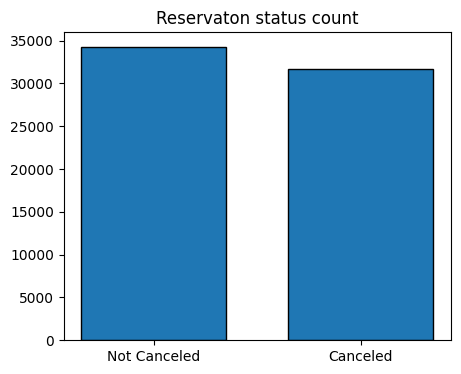

In [20]:
print(cancelled_perc)
plt.figure(figsize=(5,4))
plt.title("Reservaton status count")
plt.bar(['Not Canceled','Canceled'],data['is_canceled'].value_counts(), edgecolor='k',width=0.7)
plt.show()

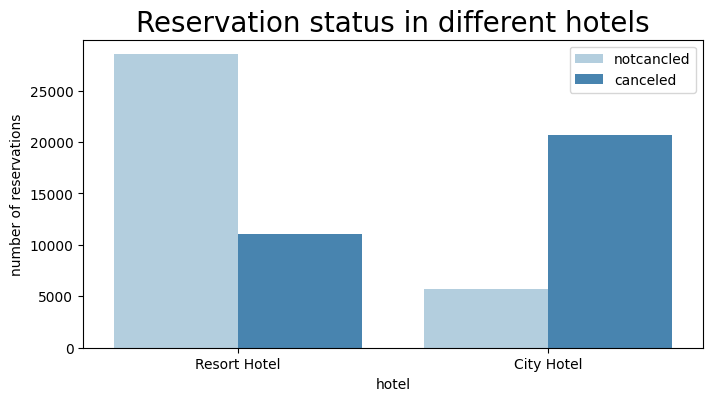

In [21]:
plt.figure(figsize=(8,4))
axl=sns.countplot(x='hotel',hue='is_canceled',data=data, palette='Blues')
legend_labels,_=axl.get_legend_handles_labels()
# Pass bbox_to_anchor as a keyword argument
axl.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status in different hotels',size=20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['notcancled', 'canceled'])
plt.show()

In [22]:
resort_hotel=data[data['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)


,proportion
is_canceled,
0,0.72025
1,0.27975


In [23]:
resort_hotel=resort_hotel.groupby('reservation_status_date')['adr'].mean()

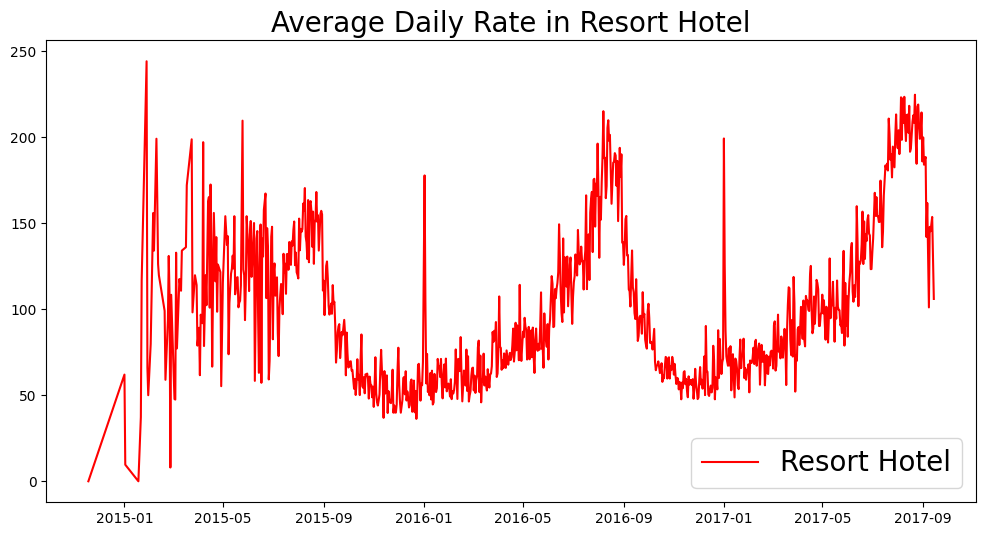

In [24]:
plt.figure(figsize=(12,6))
plt.title('Average Daily Rate in Resort Hotel',fontsize=20)

plt.plot(resort_hotel.index,resort_hotel.values,color='red' ,label='Resort Hotel')
plt.legend(fontsize=20)
plt.show()


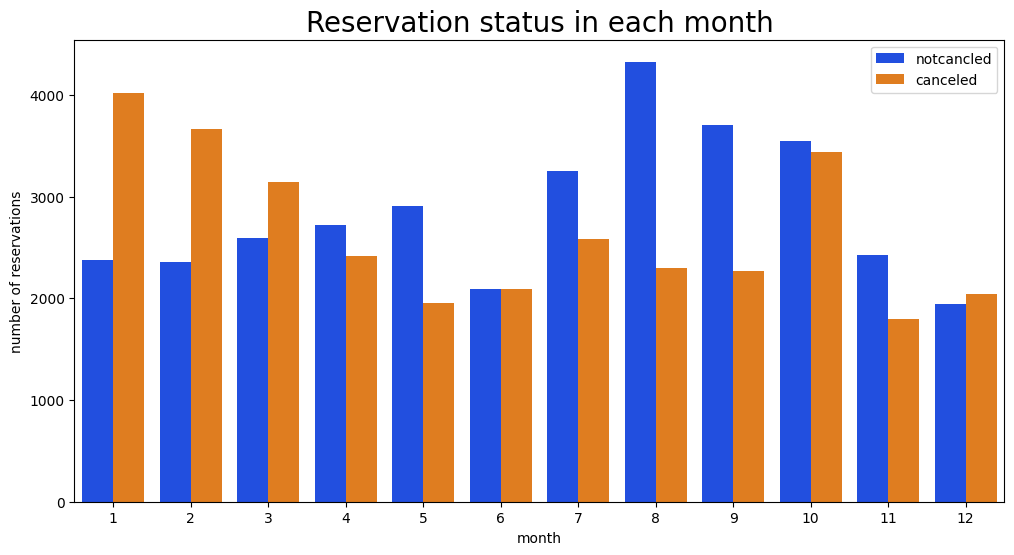

In [25]:
data['month']=data['reservation_status_date'].dt.month
plt.figure(figsize=(12,6))

axl=sns.countplot(x='month',hue='is_canceled',data=data,palette='bright')
legend_labels,_=axl.get_legend_handles_labels()
axl.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status in each month',fontsize=20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['notcancled', 'canceled'])
plt.show()

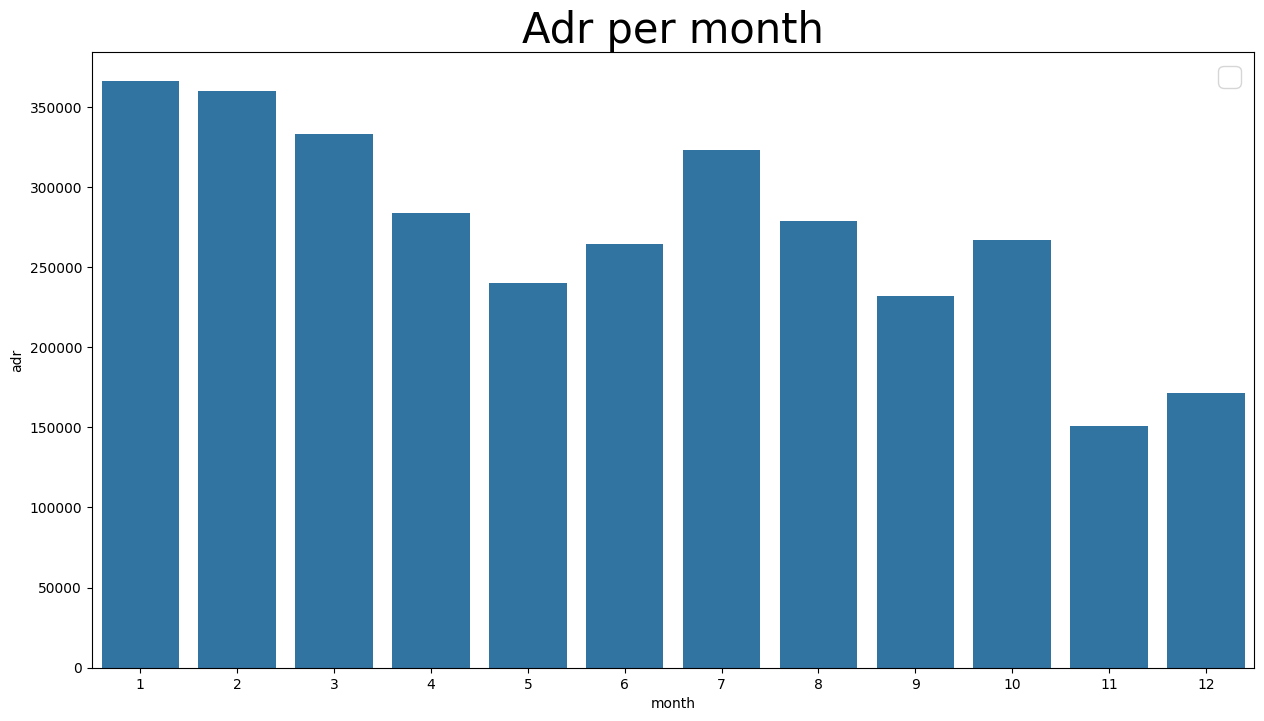

In [30]:
plt.figure(figsize=(15,8))
plt.title('Adr per month',fontsize=30)
sns.barplot(x='month',y='adr',data=data[data['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())

plt.legend(fontsize=20)
plt.show()

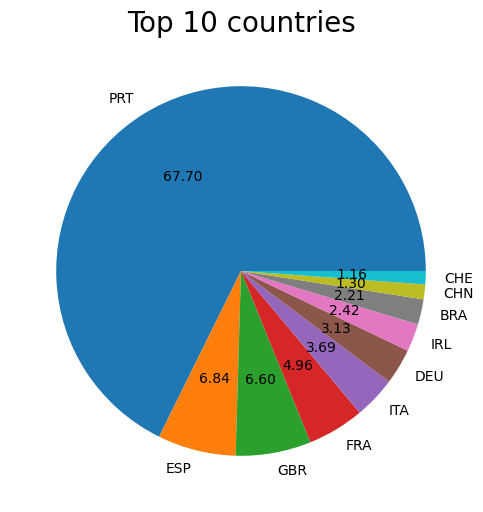

In [32]:
# top_10_country=data.groupby('country')['is_canceled'].value_counts(normalize=True).head(10)
cancelled_data=data[data['is_canceled']==1]
top_10_country=cancelled_data['country'].value_counts().head(10)
plt.figure(figsize=(12,6))
plt.title('Top 10 countries',fontsize=20)
plt.pie(top_10_country.values,labels=top_10_country.index,autopct='%.2f')
plt.show()

In [33]:
data['market_segment'].value_counts()

,count
market_segment,
Online TA,29841
Offline TA/TO,13363
Groups,12385
Direct,7483
Corporate,2620
Complementary,262
Aviation,32


In [34]:
from pickle import TRUE
data['market_segment'].value_counts(normalize=Truw])

,proportion
market_segment,
Online TA,0.452232
Offline TA/TO,0.202513
Groups,0.187691
Direct,0.113403
Corporate,0.039705
Complementary,0.003971
Aviation,0.000485


In [57]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')['adr'].mean()
# Reset the index and assign the result back to cancelled_df_adr
cancelled_df_adr = cancelled_df_adr.reset_index()  # Removing inplace=True and reassigning
cancelled_df_adr.sort_values('reservation_status_date', inplace=True) # Sorting by 'adr' instead of 'reservation_satus_data'

# Filter data for bookings that were not canceled
not_cancelled_data = data[data['is_canceled'] == 0]

# Calculate average daily rate for not canceled bookings, grouped by reservation status date
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')['adr'].mean()

# Reset the index to make 'reservation_status_date' a column again
not_cancelled_df_adr = not_cancelled_df_adr.reset_index()

# Sort by 'adr' in descending order
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

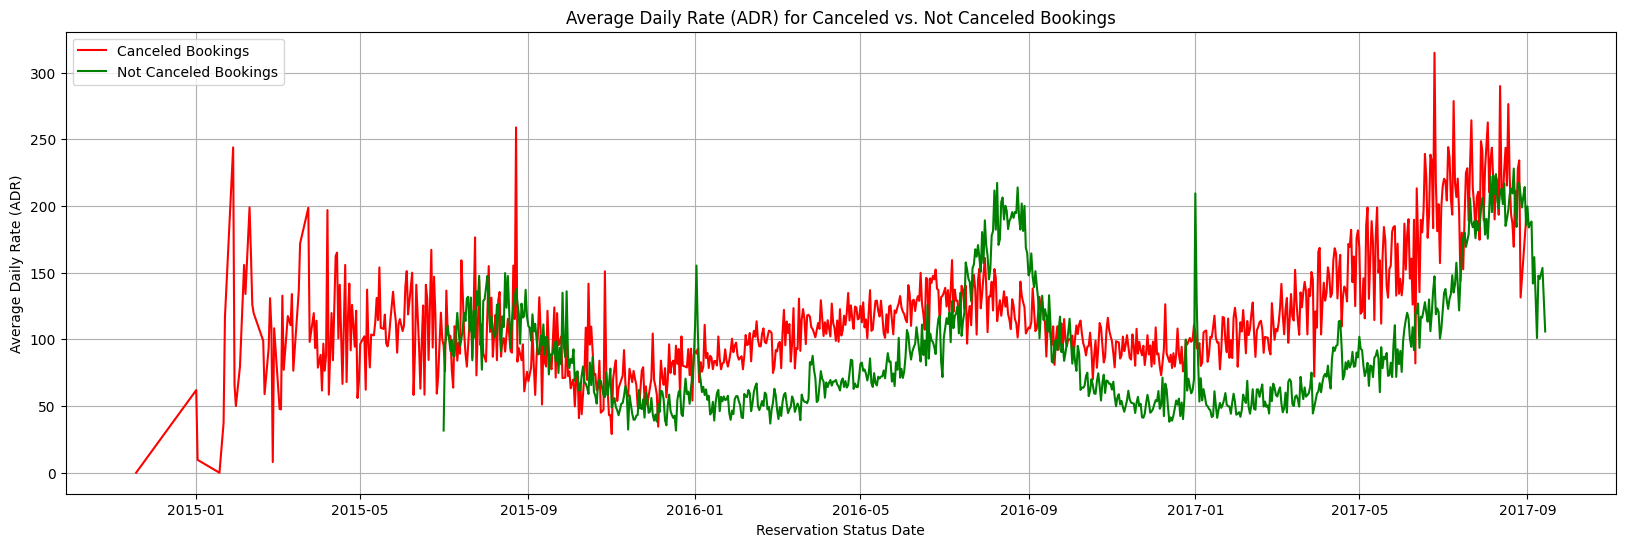

In [58]:


# ... (previous code to calculate cancelled_df_adr and not_cancelled_df_adr) ...

# Plotting the graph
plt.figure(figsize=(20, 6))
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label='Canceled Bookings', color='red')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label='Not Canceled Bookings', color='green')
plt.title('Average Daily Rate (ADR) for Canceled vs. Not Canceled Bookings')
plt.xlabel('Reservation Status Date')
plt.ylabel('Average Daily Rate (ADR)')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output

In [60]:
def plot_cancellation_rate(data):
    cancelled_perc = data['is_canceled'].value_counts(normalize=True)
    plt.figure(figsize=(5, 4))
    plt.title("Reservation Status Count")
    plt.bar(['Not Canceled', 'Canceled'], data['is_canceled'].value_counts(), edgecolor='k', width=0.7)
    plt.show()

def plot_cancellation_by_hotel(data):
    plt.figure(figsize=(8, 4))
    axl = sns.countplot(x='hotel', hue='is_canceled', data=data, palette='Blues')
    # ... (rest of your plotting code) ...

In [61]:
hotel_dropdown = widgets.Dropdown(
    options=data['hotel'].unique(),
    description='Select Hotel:',
    value=data['hotel'].unique()[0]
)

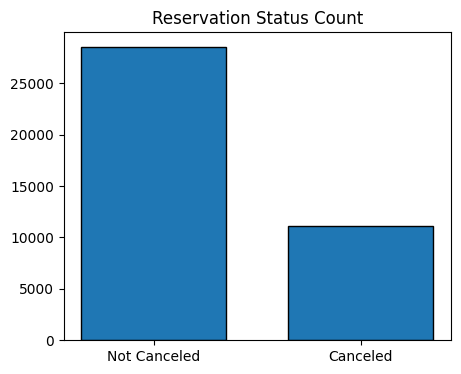

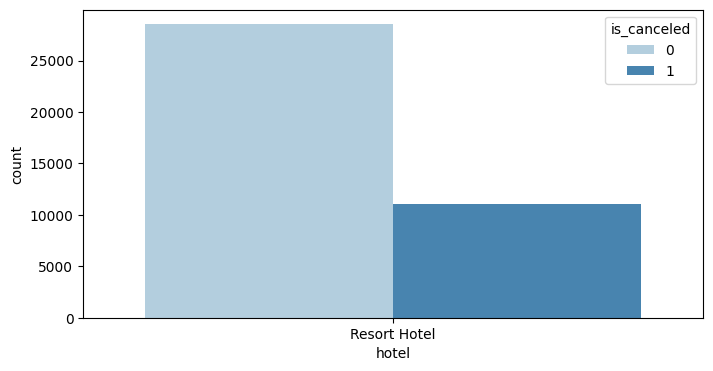

In [62]:
# ... (functions for charts defined above) ...

def update_dashboard(change):
    clear_output()
    filtered_data = data[data['hotel'] == hotel_dropdown.value]
    plot_cancellation_rate(filtered_data)
    plot_cancellation_by_hotel(filtered_data)

hotel_dropdown.observe(update_dashboard, names='value')

display(hotel_dropdown)
update_dashboard(None)  # Initial display